In [47]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import os
from pandas.tseries import converter
converter.register()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  import sys


In [48]:
conn = pymysql.connect(
    host='192.168.100.225',
    port=3306,
    user='root',
    password='its@1234',
    db='UYeG_KUMHO',
    charset='utf8'
)

curs = conn.cursor()

set_day1 = '2019-10-10 00:00:00'
set_day2 = '2019-10-25 23:59:59'


# LAST 24HOURS : 2019-10-09 10:00:00 ~ 2019-10-10 10:00:00 : 10초 데이터 가져오기
sql_peak = "SELECT DataSavedTime, Value FROM HisPeakHour\
    WHERE DefTable = 'HisItemCurr' AND DefColumn = 'Item001' AND DataSavedTime \
    BETWEEN '"+set_day1+"' and '"+set_day2+"' ORDER BY DataSavedTime ASC"

curs.execute(sql_peak)
rows_peak=curs.fetchall()
conn.close()

data_peak = list(rows_peak)
df_peak = pd.DataFrame(data_peak)

df_peak.columns = ['DataSavedTime', 'Value']

print(df_peak)

          DataSavedTime   Value
0   2019-10-10 00:00:00  114.15
1   2019-10-10 02:00:00  121.64
2   2019-10-10 03:00:00  116.74
3   2019-10-10 04:00:00  115.03
4   2019-10-10 05:00:00  118.72
..                  ...     ...
263 2019-10-25 04:00:00  114.47
264 2019-10-25 05:00:00  113.71
265 2019-10-25 07:00:00  113.87
266 2019-10-25 08:00:00  118.78
267 2019-10-25 09:00:00  108.15

[268 rows x 2 columns]


In [49]:
ma5 = df_peak['Value'].rolling(window=5).mean()
ma24 = df_peak['Value'].rolling(window=24).mean()
ma60 = df_peak['Value'].rolling(window=60).mean()
ma120 = df_peak['Value'].rolling(window=120).mean()
print(ma5.tail())
print(ma24.tail())

263    113.290
264    112.990
265    113.898
266    114.538
267    113.796
Name: Value, dtype: float64
263    113.884167
264    113.957500
265    113.727917
266    113.702917
267    113.445833
Name: Value, dtype: float64


In [50]:
new_df_peak = df_peak
new_df_peak.insert(len(df_peak.columns), "MA5", ma5)
new_df_peak.insert(len(new_df_peak.columns), "MA24", ma24)
new_df_peak.insert(len(new_df_peak.columns), "MA60", ma60)
new_df_peak.insert(len(new_df_peak.columns), "MA120", ma120)
print(new_df_peak.tail(5))

          DataSavedTime   Value      MA5        MA24        MA60       MA120
263 2019-10-25 04:00:00  114.47  113.290  113.884167  113.750833  114.155917
264 2019-10-25 05:00:00  113.71  112.990  113.957500  113.752333  114.168750
265 2019-10-25 07:00:00  113.87  113.898  113.727917  113.863167  114.137833
266 2019-10-25 08:00:00  118.78  114.538  113.702917  113.947500  114.146667
267 2019-10-25 09:00:00  108.15  113.796  113.445833  113.912000  114.081333


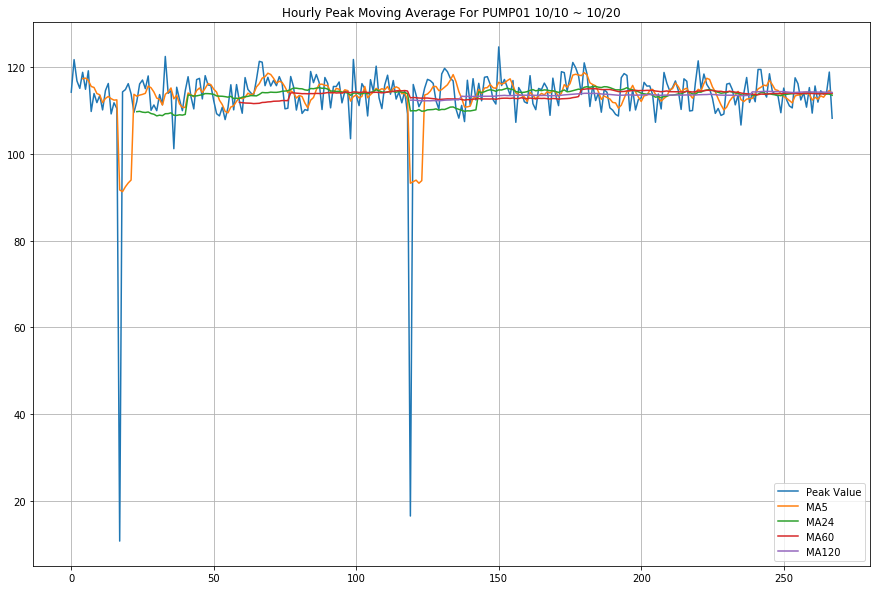

In [52]:
plt.figure(figsize=(15,10))
plt.plot(new_df_peak.index, new_df_peak['Value'], label="Peak Value")
plt.plot(new_df_peak.index, new_df_peak['MA5'], label="MA5")
plt.plot(new_df_peak.index, new_df_peak['MA24'], label="MA24")
plt.plot(new_df_peak.index, new_df_peak['MA60'], label="MA60")
plt.plot(new_df_peak.index, new_df_peak['MA120'], label="MA120")
plt.legend(loc='best')
plt.title("Hourly Peak Moving Average For PUMP01 10/10 ~ 10/20")
plt.grid()
plt.show()